In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
#Preparing and Visualizing data

classes = 4
m = 100
centers=[[-5,2], [-2,2], [1,2], [5,2]]
std = 1.0

X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std = std, random_state = 30)

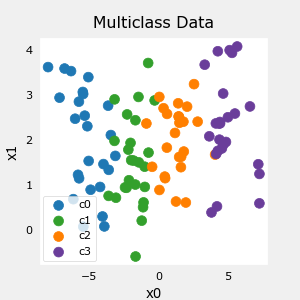

In [5]:
plt_mc(X_train,y_train,classes, centers, std=std)

In [11]:
#Show classes in dataset
print(f"Unique classes: {np.unique(y_train)}")

#Show how classes are represented
print(f"Class representation: {y_train[:10]}")

#Show shapes of our dataset

print(f"Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}")

Unique classes: [0 1 2 3]
Class representation: [3 3 3 0 3 3 3 3 2 0]
Shape of X_train: (100, 2), Shape of y_train: (100,)


In [12]:
#Creating the Model

tf.random.set_seed(1234) #For consistent results

model = Sequential([
    Dense(2, activation='relu', name='L1'),
    Dense(4, activation='linear', name='L2')
])

In [14]:
#Training the Model

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01)
)

model.fit(
    X_train, y_train,
    epochs = 200
)

Epoch 1/200
4/4 [==============================] - 0s 1ms/step - loss: 1.4364
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 1.3942
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 1.3706
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 1.3473
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 1.3256
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 1.3062
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 1.2862
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 1.2635
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 1.2416
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 1.2142
Epoch 11/200
4/4 [==============================] - 0s 1000us/step - loss: 1.1879
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 1.1578
Epoch 13/200
4/4 [==============================] - 0s 1ms

4/4 [==============================] - 0s 1ms/step - loss: 0.3161
Epoch 105/200
4/4 [==============================] - 0s 1000us/step - loss: 0.3172
Epoch 106/200
4/4 [==============================] - 0s 1000us/step - loss: 0.3174
Epoch 107/200
4/4 [==============================] - 0s 1ms/step - loss: 0.3132
Epoch 108/200
4/4 [==============================] - 0s 1ms/step - loss: 0.3116
Epoch 109/200
4/4 [==============================] - 0s 1ms/step - loss: 0.3087
Epoch 110/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3069
Epoch 111/200
4/4 [==============================] - 0s 1ms/step - loss: 0.3035
Epoch 112/200
4/4 [==============================] - 0s 1ms/step - loss: 0.3027
Epoch 113/200
4/4 [==============================] - 0s 1ms/step - loss: 0.2999
Epoch 114/200
4/4 [==============================] - 0s 1ms/step - loss: 0.2997
Epoch 115/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2992
Epoch 116/200
4/4 [=============================

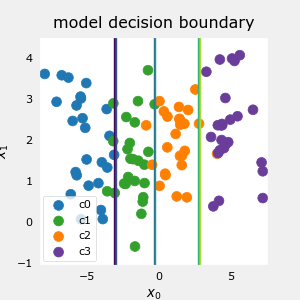

In [16]:
#Decision boundaries

plt_cat_mc(X_train, y_train, model, classes)

In [17]:
# gather the trained parameters from the first layer
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

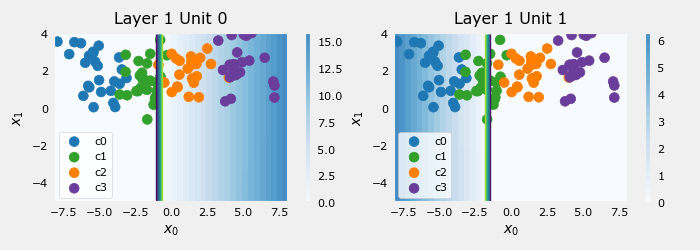

In [18]:
# plot the function of the first layer
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

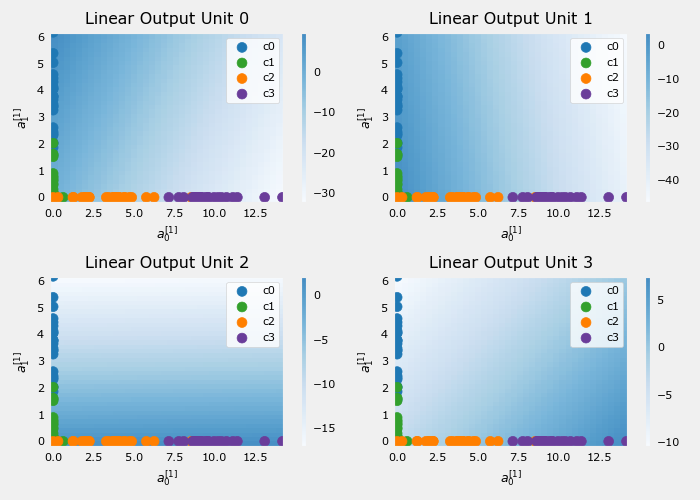

In [19]:
# gather the trained parameters from the output layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# create the 'new features', the training examples after L1 transformation
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))